## Example usage of autoformula library

### Import of basic libraries (numpy, pandas) and autoformula 

In [33]:
import numpy as np
import pandas as pd

from autoformula import (
    preprocess_dataset,
    detect_feature_types,
    type_mismatch,
    handle_selected_missmatch,
    feature_summary,
    check_correlations,
    plot_correlation_heatmaps,
    cramers_v_matrix,
    compute_overlap,
    compute_separability,
    compute_impact,
    compute_feature_quality,
    generate_custom_feature_combinations
)


### Uploading of csv and basic info 

In [2]:
path=r'/Users/sofiiamanko/autoformula/cirrhosis.csv'
df = pd.read_csv(path)
print(len(df))
df.head()

418


,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


## Basic preparation od dataset (Sanitization)

### Sanitization od dataset with sampling turned on

sample_rows = 400 not to break the logic of not big enough dataset.

In [3]:
df_clean = preprocess_dataset(df, target="Status", sample_rows=400)
df_clean

Initial dataset shape: (418, 20)
No duplicate rows found.
No duplicate columns found.
Dataset shape after sanitization: (400, 20)


,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,155,2666,C,Placebo,15909,F,N,Y,Y,S,0.6,220.0,3.35,57.0,1620.0,153.45,80.0,311.0,11.2,4.0
1,57,3282,D,D-penicillamine,19567,F,N,Y,N,S,2.3,260.0,3.18,231.0,11320.2,105.78,94.0,216.0,12.4,3.0
2,118,2288,D,D-penicillamine,17844,F,N,Y,N,N,3.5,390.0,3.30,67.0,878.0,137.95,93.0,207.0,10.2,3.0
3,158,2475,CL,D-penicillamine,13329,F,N,N,N,N,3.4,450.0,3.37,32.0,1408.0,116.25,118.0,313.0,11.2,2.0
4,391,1443,C,NaN,14975,F,NaN,NaN,NaN,N,1.2,NaN,2.80,NaN,NaN,NaN,NaN,120.0,11.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,318,1680,C,NaN,15706,F,NaN,NaN,NaN,N,0.7,NaN,3.68,NaN,NaN,NaN,NaN,306.0,9.5,2.0
396,194,2449,C,D-penicillamine,16216,F,N,N,N,N,1.5,293.0,4.30,50.0,975.0,125.55,56.0,336.0,9.1,2.0
397,146,2615,C,Placebo,12369,F,N,N,N,S,1.2,NaN,3.89,58.0,1284.0,173.60,NaN,239.0,9.4,3.0
398,276,1481,C,D-penicillamine,18302,F,N,N,N,N,1.0,219.0,3.85,67.0,640.0,145.00,108.0,95.0,10.7,2.0


## Research and preparation of data types (Feature Types)

### Detecting the visual missmatch beetween real type of column and technical

In [4]:
df_types = detect_feature_types(df_clean, min_success=0.95, detect_mixed= True)
df_types

,column,pandas_dtype,detected_type,mixed_type
0,ID,int64,numeric,False
1,N_Days,int64,numeric,False
2,Status,object,categorical,False
3,Drug,object,categorical,False
4,Age,int64,numeric,False
5,Sex,object,categorical,False
6,Ascites,object,bool,False
7,Hepatomegaly,object,bool,False
8,Spiders,object,bool,False
9,Edema,object,categorical,False


###
We detected that types of data in columns 'Ascites', 'Hepatomegaly', 'Spiders' can be chaged to bool. 


We don't have any mixed columns, but if any columns has more than 95% numeric (or categorical) values it would be True.


So we can use another function to deep dive into it. For example, the column 'Sex' can also have 2 values - M and F, so can be chaged to bool. 

### Detecting of missmatch 

and handling it to more convenient usage of data

In [5]:
df_mismatch=type_mismatch(df_types)
df_mismatch

,column,pandas_dtype,detected_type,mixed_type
2,Status,object,categorical,False
3,Drug,object,categorical,False
5,Sex,object,categorical,False
6,Ascites,object,bool,False
7,Hepatomegaly,object,bool,False
8,Spiders,object,bool,False
9,Edema,object,categorical,False


Now we can see the exact columns with missmatch datatypes according to logic of function type_mismatch(). 

And if that missmatch is correct we can handle it with next funtion.

### Handling the data missmatch

In [6]:
selected_cols = ["Ascites", "Hepatomegaly", "Spiders", "Sex", "Drug", 'Status', 'Edema']
df_fixed=handle_selected_missmatch(df_clean, df_types, selected_cols)

Converted 'Ascites' to boolean.
Converted 'Hepatomegaly' to boolean.
Converted 'Spiders' to boolean.
Converted 'Sex' to category.
Converted 'Drug' to category.
Converted 'Status' to category.
Converted 'Edema' to category.


###
double check:

In [7]:
df_fixed.dtypes

ID                  int64
N_Days              int64
Status           category
Drug             category
Age                 int64
Sex              category
Ascites           boolean
Hepatomegaly      boolean
Spiders           boolean
Edema            category
Bilirubin         float64
Cholesterol       float64
Albumin           float64
Copper            float64
Alk_Phos          float64
SGOT              float64
Tryglicerides     float64
Platelets         float64
Prothrombin       float64
Stage             float64
dtype: object

### Before going to analysis part let's check some interesting information about our final fixed df

In [8]:
feature_summary(df_fixed)

,dtype,n_unique,missing_rate,is_constant,dominant_ratio,dominant_value
feature,,,,,,
ID,int64,400,0.0000,False,0.0025,155
N_Days,int64,382,0.0000,False,0.0050,3445
Status,category,3,0.0000,False,0.5550,C
Drug,category,2,0.2525,False,0.3750,Placebo
Age,int64,331,0.0000,False,0.0175,19724
Sex,category,2,0.0000,False,0.8975,F
Ascites,boolean,2,0.2525,False,0.6875,False
Hepatomegaly,boolean,2,0.2525,False,0.3850,True
Spiders,boolean,2,0.2525,False,0.5325,False


## Deep feature analysis (Analysis)

### Firstly we can basicly check correlations beetweet numerical values.

In [9]:
correlations = check_correlations(df_fixed)

Pearson:
                     ID    N_Days       Age   Ascites  Hepatomegaly   Spiders  \
ID            1.000000 -0.360978  0.029365 -0.116399     -0.075015 -0.111206   
N_Days       -0.360978  1.000000 -0.119474 -0.317038     -0.276050 -0.266549   
Age           0.029365 -0.119474  1.000000  0.248894      0.089507 -0.048335   
Ascites      -0.116399 -0.317038  0.248894  1.000000      0.163510  0.165797   
Hepatomegaly -0.075015 -0.276050  0.089507  0.163510      1.000000  0.291326   

              Bilirubin  Cholesterol   Albumin    Copper  Alk_Phos      SGOT  \
ID            -0.069073     0.031565 -0.130247 -0.098793 -0.360026 -0.011019   
N_Days        -0.403824    -0.141181  0.425749 -0.355050  0.157088 -0.218294   
Age            0.004484    -0.165250 -0.184978  0.049808 -0.042126 -0.147909   
Ascites        0.377082    -0.060219 -0.394496  0.231889  0.007065  0.094996   
Hepatomegaly   0.300780     0.137501 -0.294854  0.226938  0.108151  0.136685   

              Tryglicerides 

For better understanding we can use some visualizations.

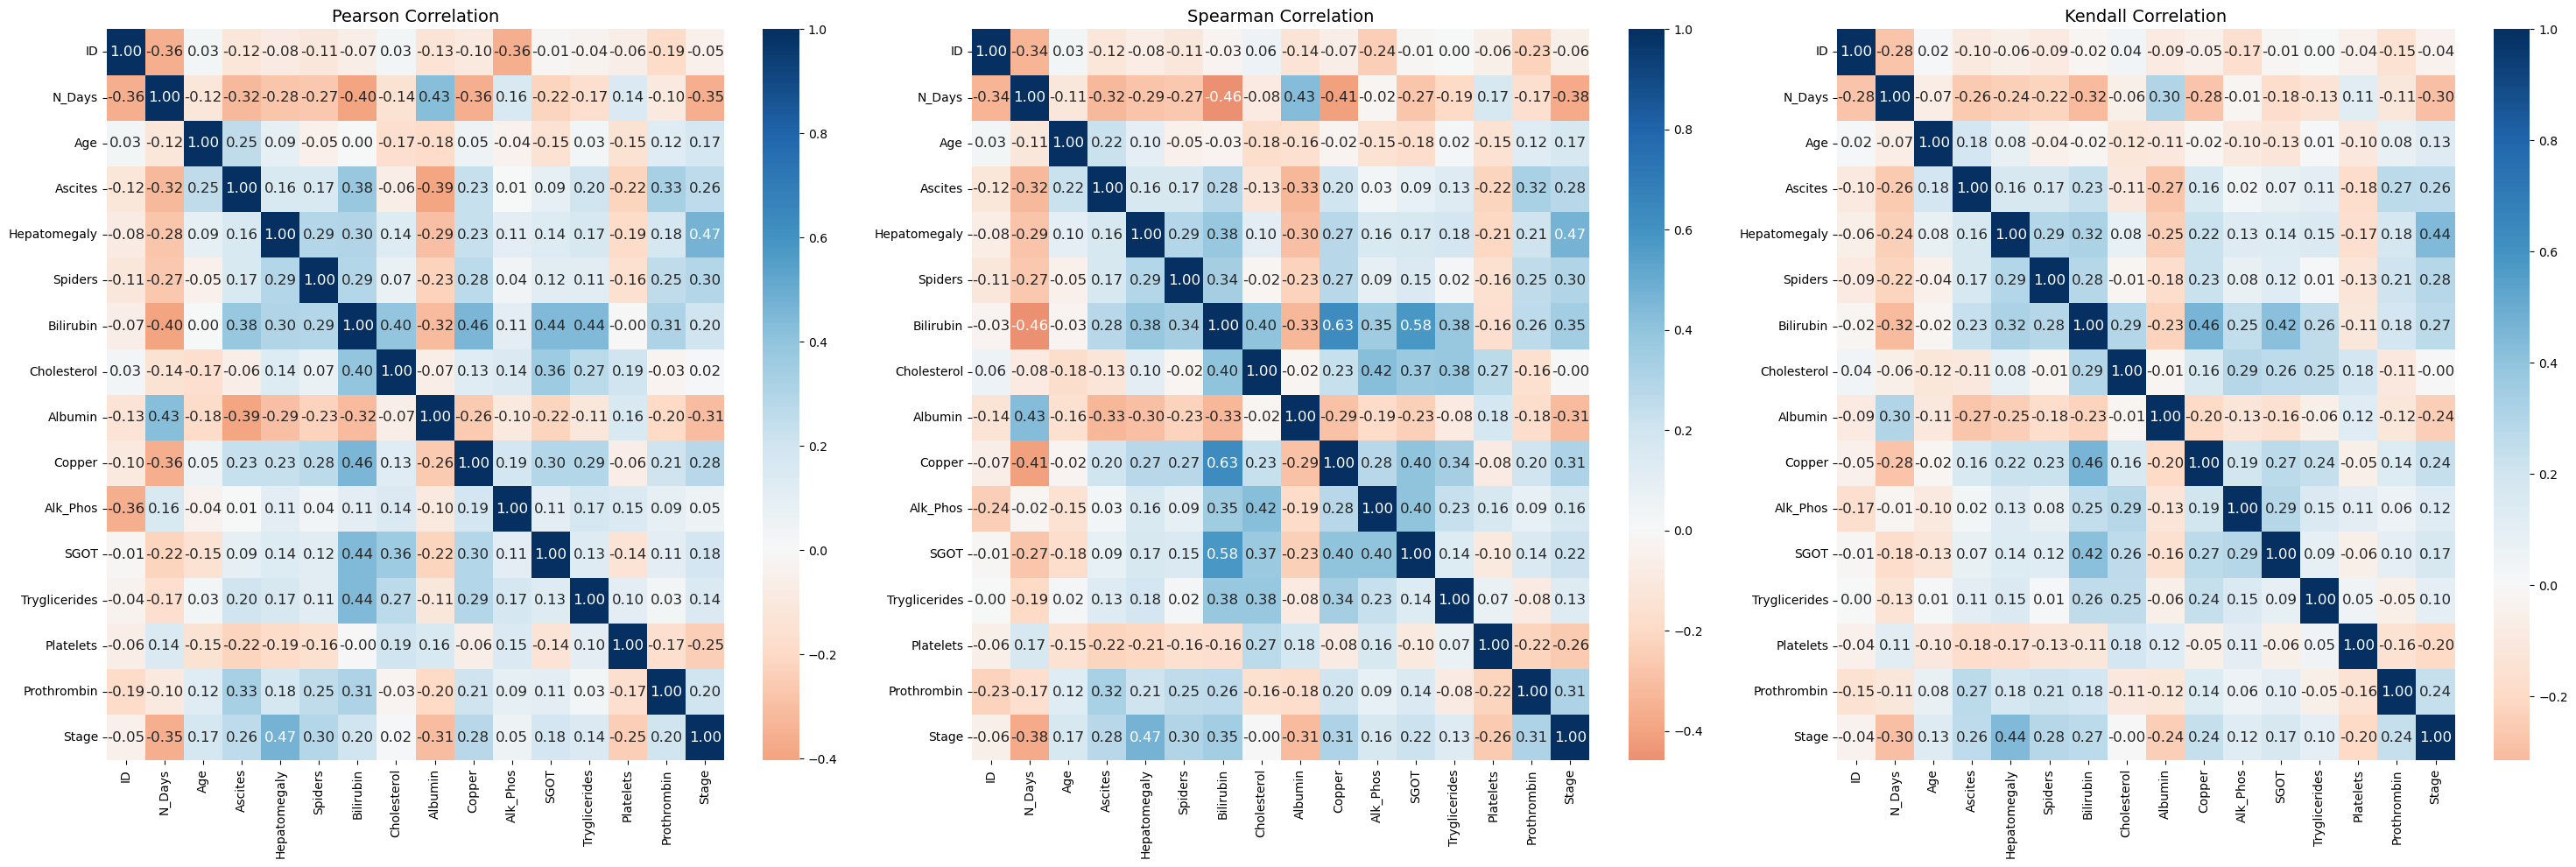

In [10]:
plot_correlation_heatmaps(correlations)

Now we can see some interesting things.

- **Pearson** - linear dependence
- **Spearman** — monotonic (rank-based) dependence
- **Kendall** - strict rank correlation, robust to noise

Hepatomegaly, Ascites, Spiders, Copper, Prothrombin have stable and meaningful correlation with `Stage` (target).

Albumin demonstrates negative correlation with **Stage** , Bilirubin, Copper.

Bilirubin shows strong correlations with several biochemical features: Copper, SGOT, Alk_Phos, Cholesterol. 

ID is non-informative. 



In [11]:
df_fixed.drop(columns='ID', inplace=True)

### Next step - check relationships within categorical values

In [12]:
### Next step - check relationships within categorical values

Cramérs V computed for 7 categorical features.


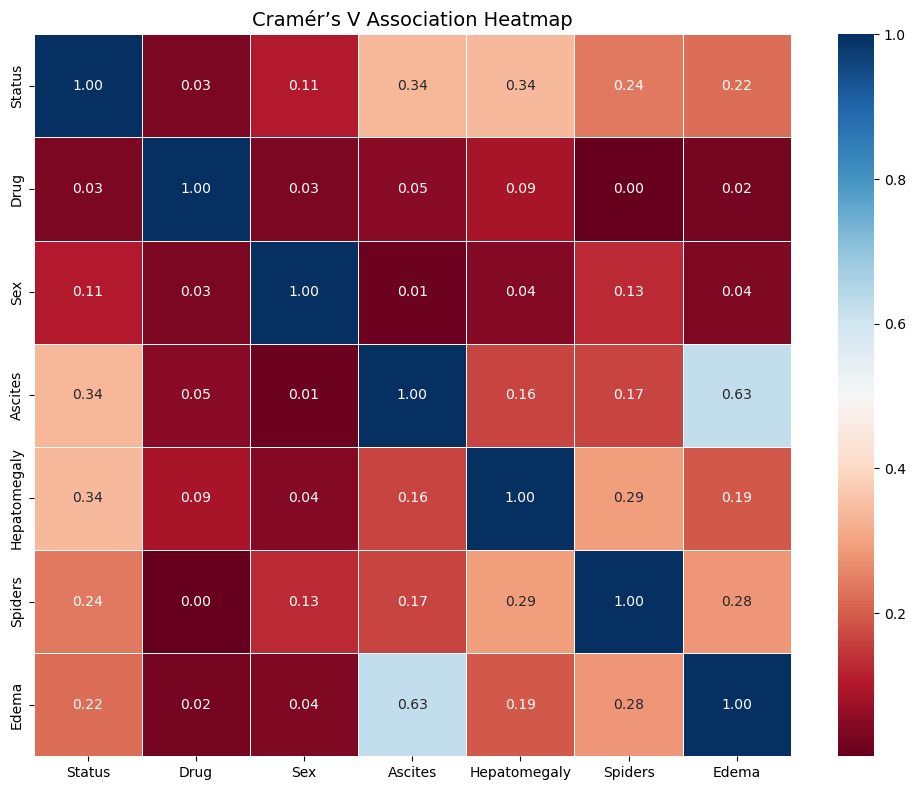

,Status,Drug,Sex,Ascites,Hepatomegaly,Spiders,Edema
Status,1.000000,0.030888,0.105405,0.335737,0.337509,0.237490,0.222386
Drug,0.030888,1.000000,0.033198,0.050225,0.090242,0.002125,0.024947
Sex,0.105405,0.033198,1.000000,0.013795,0.042784,0.129490,0.036032
Ascites,0.335737,0.050225,0.013795,1.000000,0.163510,0.165797,0.625318
Hepatomegaly,0.337509,0.090242,0.042784,0.163510,1.000000,0.291326,0.191329
Spiders,0.237490,0.002125,0.129490,0.165797,0.291326,1.000000,0.280838
Edema,0.222386,0.024947,0.036032,0.625318,0.191329,0.280838,1.000000


In [13]:
cramers_v_matrix(df_fixed)

Strongest association is beetween Ascites and Edema. 

Status (target) shows **moderate associations** with Ascites, Hepatomegaly, Spiders, Edema. 

### Core of data anysis - computing of overlap, seperability and impact scores for forming a leaderboard of the best features for training ML.

#### Overlap score

In [14]:
compute_overlap(df_fixed)

{'feature_overlap':           feature  overlap_score
 0            Drug       0.029678
 1             Sex       0.067988
 2             Age       0.194829
 3          Status       0.199667
 4           Edema       0.250048
 5       Platelets       0.250369
 6     Prothrombin       0.297069
 7         Spiders       0.311757
 8         Ascites       0.353995
 9         Albumin       0.363614
 10  Tryglicerides       0.363911
 11   Hepatomegaly       0.385761
 12       Alk_Phos       0.392332
 13    Cholesterol       0.399376
 14          Stage       0.399582
 15         N_Days       0.433818
 16           SGOT       0.462410
 17         Copper       0.480618
 18      Bilirubin       0.557082,
 'pairwise_overlap':          feature_a    feature_b            type_pair  overlap_score
 0           N_Days       Status  numeric-categorical       0.167414
 1           N_Days         Drug  numeric-categorical       0.005587
 2           N_Days          Age      numeric-numeric       0.114102
 3  

In [15]:
overlap_dict=compute_overlap(df_fixed)

for k, v in overlap_dict.items():
    display(v)

,feature,overlap_score
0,Drug,0.029678
1,Sex,0.067988
2,Age,0.194829
3,Status,0.199667
4,Edema,0.250048
5,Platelets,0.250369
6,Prothrombin,0.297069
7,Spiders,0.311757
8,Ascites,0.353995
9,Albumin,0.363614


,feature_a,feature_b,type_pair,overlap_score
0,N_Days,Status,numeric-categorical,0.167414
1,N_Days,Drug,numeric-categorical,0.005587
2,N_Days,Age,numeric-numeric,0.114102
3,N_Days,Sex,numeric-categorical,0.000201
4,N_Days,Ascites,numeric-numeric,0.318021
...,...,...,...,...
166,Tryglicerides,Prothrombin,numeric-numeric,0.079213
167,Tryglicerides,Stage,numeric-numeric,0.133462
168,Platelets,Prothrombin,numeric-numeric,0.221131
169,Platelets,Stage,numeric-numeric,0.258924


Drug and Sex have low overlap score, have almostly only unique info. 

Age, Status, Edema, Platelets, Prothrombin have moderate score, have unique info, but sometimes duplicate each other. 

Bilirubin, Copper, SGOT, N_Days, Stage have high overlap score, but it can be explained by their nature. Multicollinearity is possible.

In [16]:
compute_separability(X=df_fixed, y=df_fixed['Status'])

,feature,separability_score,perm_p_value
0,Status,1.000000,0.000000
1,Edema,0.222386,0.000000
2,Copper,0.193727,0.000000
3,Bilirubin,0.182887,0.000000
4,N_Days,0.167414,0.000000
5,Hepatomegaly,0.151235,0.000000
6,Ascites,0.148742,0.000000
7,Prothrombin,0.123198,0.000000
8,Stage,0.113539,0.000000
9,SGOT,0.109254,0.000000


The compute_separability function evaluates how well each individual feature separates the target classes and whether this separation is statistically significant.

Edema, Copper, Bilirubin, N_Days, Hepatomegaly, Ascites provide the clearest class separation and are reliably informative, not explained by random chance.

They should be considered core predictors in downstream models.

In [17]:
compute_impact(X=df_fixed, y=df_fixed['Status'])

,feature,impact_score,impact_metric,test,p_value
0,Status,1.000000,cramers_v,chi2,7.679830e-172
1,Edema,0.222386,cramers_v,chi2,5.325648e-08
2,Bilirubin,0.182887,eta_squared,kruskal,1.822274e-24
3,N_Days,0.167414,eta_squared,kruskal,8.544681e-17
4,Copper,0.144702,eta_squared,kruskal,7.020851e-13
5,Prothrombin,0.122536,eta_squared,kruskal,2.006595e-14
6,Hepatomegaly,0.113912,eta_squared,kruskal,4.253439e-08
7,Ascites,0.112720,eta_squared,kruskal,5.080821e-08
8,Stage,0.111875,eta_squared,kruskal,1.237721e-10
9,Sex,0.105405,cramers_v,chi2,1.083889e-01


Edema, Bilirubin, N_Days, Copper, Prothrombin, Stage have the strongest and highly significant effects on target.

Age, SGOT, Albumin have moderate contribution.

Sex, Drug, Platelets, Triglycerides have weak effects - low modeling value. 

Most of the signal comes from a small clinical feature set. The rest can be deprioritized.

In [19]:
compute_feature_quality(X=df_fixed, y=df_fixed['Status'])

,feature,overlap_score,separability_score,perm_p_value,impact_score,impact_metric,test,p_value,final_score
0,Status,0.199667,1.000000,0.000000,1.000000,cramers_v,chi2,7.679830e-172,0.800333
1,Edema,0.250048,0.222386,0.000000,0.222386,cramers_v,chi2,5.325648e-08,0.037089
2,N_Days,0.433818,0.167414,0.000000,0.167414,eta_squared,kruskal,8.544681e-17,0.015869
3,Bilirubin,0.557082,0.182887,0.000000,0.182887,eta_squared,kruskal,1.822274e-24,0.014815
4,Copper,0.480618,0.193727,0.000000,0.144702,eta_squared,kruskal,7.020851e-13,0.014560
5,Ascites,0.353995,0.148742,0.000000,0.112720,eta_squared,kruskal,5.080821e-08,0.010831
6,Prothrombin,0.297069,0.123198,0.000000,0.122536,eta_squared,kruskal,2.006595e-14,0.010612
7,Hepatomegaly,0.385761,0.151235,0.000000,0.113912,eta_squared,kruskal,4.253439e-08,0.010582
8,Sex,0.067988,0.105405,0.086667,0.105405,cramers_v,chi2,1.083889e-01,0.010355
9,Stage,0.399582,0.113539,0.000000,0.111875,eta_squared,kruskal,1.237721e-10,0.007627


What stands out here is that most of the predictive signal comes from a small core of clinical features**.  
`Edema`, `N_Days`, `Bilirubin`, `Copper`, `Ascites` and `Prothrombin` consistently show a good balance between separability, impact and statistical significance. These are the features I would prioritize when building a model.

There is a second tier of reasonably useful but non-critical features (`Hepatomegaly`, `Stage`, `Age`, `SGOT`). They add information, but mainly as supporting variables rather than primary drivers.

Features like `Sex`, `Drug`, `Platelets`, `Cholesterol`, and `Triglycerides` appear weak overall. Their signal is limited and from a modeling perspective they can likely be dropped without meaningful loss in performance, unless domain knowledge suggests otherwise.

**Overall summary:**  
The final quality score does a good job of highlighting what actually matters. It narrows the feature set down to a compact, meaningful subset and makes the trade-off between signal strength and noise very clear.


## Feature Engineering (Feature Generation)

Now we can move on and start experimenting with features to make them more informative for model.

In [23]:
df_new_features=generate_feature_combinations(df=df_fixed, max_pairs=5)

In [31]:
pd.set_option("display.max_rows", None)
display(df_new_features.dtypes.to_frame("dtype"))



,dtype
N_Days,int64
Status,category
Drug,category
Age,int64
Sex,category
Ascites,boolean
Hepatomegaly,boolean
Spiders,boolean
Edema,category
Bilirubin,float64


WE can use another fuction for custom feature engineering.

In [36]:
unary_ops = {
    "log": lambda x: np.log(x + 1),
    "zscore": lambda x: (x - x.mean()) / x.std(),
    "abs": lambda x: x.abs(),
}

binary_ops = {
    "ratio": lambda x1, x2: x1 / (x2 + 1e-6),
    "diff": lambda x1, x2: x1 - x2,
    "prod": lambda x1, x2: x1 * x2,
}

df_extended = generate_custom_feature_combinations(
    df_fixed,
    unary_ops=unary_ops,
    binary_ops=binary_ops,
    max_pairs=10,
    random_state=42,
)

print("Original shape:", df_fixed.shape)
print("Extended shape:", df_extended.shape)

new_cols = [c for c in df_extended.columns if c not in df_fixed.columns]
print("New features:", new_cols[:10])

Original shape: (400, 19)
Extended shape: (400, 94)
New features: ['log_N_Days', 'zscore_N_Days', 'abs_N_Days', 'log_Age', 'zscore_Age', 'abs_Age', 'log_Ascites', 'zscore_Ascites', 'abs_Ascites', 'log_Hepatomegaly']


After that compute the quality score of new features and select the best one for next iterations.

In [37]:
compute_feature_quality(X=df_extended, y=df_extended['Status'])

,feature,overlap_score,separability_score,perm_p_value,impact_score,impact_metric,test,p_value,final_score
0,Status,0.245613,1.000000,0.000000,1.000000,cramers_v,chi2,7.679830e-172,7.543869e-01
1,Edema,0.442846,0.222386,0.000000,0.222386,cramers_v,chi2,5.325648e-08,2.755441e-02
2,Sex,0.077007,0.105405,0.086667,0.105405,cramers_v,chi2,1.083889e-01,1.025458e-02
3,Bilirubin_ratio_SGOT,0.876411,0.225515,0.000000,0.170278,eta_squared,kruskal,3.434578e-15,4.745849e-03
4,Bilirubin_ratio_Tryglicerides,0.897860,0.244612,0.000000,0.167197,eta_squared,kruskal,1.880474e-14,4.177348e-03
5,N_Days_ratio_Tryglicerides,0.851683,0.187090,0.000000,0.127806,eta_squared,kruskal,8.399530e-12,3.546438e-03
6,Hepatomegaly_prod_SGOT,0.919674,0.173885,0.000000,0.131004,eta_squared,kruskal,8.837603e-11,1.829789e-03
7,N_Days_ratio_Age,0.941600,0.168190,0.000000,0.168190,eta_squared,kruskal,5.674115e-18,1.651993e-03
8,Prothrombin_prod_Stage,0.939571,0.166663,0.000000,0.163176,eta_squared,kruskal,4.093917e-15,1.643393e-03
9,Bilirubin_prod_Tryglicerides,0.934141,0.175418,0.000000,0.120062,eta_squared,kruskal,2.138476e-15,1.387063e-03
